# Projeto 1 - Ciência dos Dados <font color = '#6f8676'> (PROJETO SUJO) </font>

Nome: Eiki Luis Yamashiro Batista dos Santos | 2A Engenharia

# <font color = '6f8676'> OBSERVAÇÕES:</font>

<font color = '6f8676'>
1. Ainda será feita a comparação dos dados do Brasil com de outros países dentro e fora do Mercosul.</font>

<font color = '6f8676'>
2. Este arquivo notebook é um rascunho, mas foi passado a limpo. </font>

<font color = '6f8676'>
3. O verdadeiro rascunho sem ser "passado a limpo" está no arquivo: </font> <font color = 'f7c066'> "Projeto-1-Rascunho.ipynb".</font>

<font color = '6f8676'>
4. A ideia do item "Correlação" é usar uma ferramenta que achei interessante no projeto do ano passado da Giovanna, o arquivo do projeto dela </font>(<font color = 'f7c066'> "Projeto 1 - Ciência dos Dados - Giovanna.ipynb"</font>)<font color = '6f8676'> está na pasta <font color = 'f7c066'> "Giovanna" </font> que enviei pelo blackboard. Caso o código feito seja considerado "cópia", por favor desconsiderar o item "Correlação". A ideia não era copiar, e sim utilizar uma ferramenta que achei interessante.</font>

## Pergunta a ser respondida:

#### <font color = '#6f8676'>A entrada do Brasil no Mercosul aumentou o crescimento anual do PIB brasileiro.</font>

## Explicação da hipótese e mecanismo:

O Mercado Comum do Sul, ou Mercosul, é um bloco econômico criado em <font color="red" >1991 </font>, no tratado de Assunção, com a união dos países: Argentina, Brasil, Paraguai e Uruguai. A principal fonte de movimentação financeira do Mercosul são as exportações e importações. É importante ressaltar que o Brasil ocupa a posição de líder econômico do bloco, apresentando a maior população e o maior PIB dentre os países presentes no Mercosul. A Venezuela foi o ultimo país à entrar no Mercosul. Os países associados são: Bolívia, Colombia, Peru, Equador e Chile. A hipótese é de que o Brasil teve um aumento no crescimento anual do PIB, pode-se relacionar esse crescimento com o aumento de importações e exportações. Como a principal fonte de movimentação financeira do Mercosul são as exportações e importações, então um dos mecanismos que podem relacionar esse aumento e a entrada no Mercosul seria as exportações e importações.

## Bases de dados usadas:

Para a realização do projeto foram usados tabelas do site: https://gapminder.org/data/.
As tabelas usadas foram:
1. GDP Total, yearly growth
2. Imports (% of GDP)
3. Exports (% of GDP)
    

## Análise de dados:

In [24]:
#---------------------------------------------IMPORTANDO AS BIBLIOTECAS---------------------------------------------------------
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
matplotlib.style.use('ggplot')

In [25]:
#---------------------------------------------LENDO--ARQUIVOS--DO--EXCEL--------------------------------------------------------
baby = pd.read_excel('baby.xlsx')
gdp = pd.read_excel('gdp.xlsx')
hydro = pd.read_excel('hydro.xlsx')
imports = pd.read_excel("imports.xlsx")
idh = pd.read_excel("idh.xlsx")
inflation = pd.read_excel("inflation.xlsx")
importsgdp = pd.read_excel("imports_percent_of_gdp.xlsx")
exportsgdp = pd.read_excel("exports_percent_of_gdp.xlsx")
#-----------------------------------------------DEFININDO--O--ÍNDICE------------------------------------------------------------
baby = baby.set_index("country")
gdp = gdp.set_index("country")
hydro = hydro.set_index("country")
imports = imports.set_index("country")
idh = idh.set_index("country")
inflation = inflation.set_index("country")
importsgdp = importsgdp.set_index("country")
exportsgdp = exportsgdp.set_index("country")
#-----------------------------------------------SELEÇÃO--DOS--PAÍSES------------------------------------------------------------
baby = baby.loc[["Brazil", "South Africa", "Austria", "Norway", "New Zealand", "Russia", "China", "India"]].transpose()
gdp = gdp.loc[["Brazil", "South Africa", "Austria", "Norway", "New Zealand", "Russia", "China", "India"]].transpose()
hydro = hydro.loc[["Brazil", "South Africa", "Austria", "Norway", "New Zealand", "Russia", "China", "India"]].transpose()
imports = imports.loc[["Brazil", "South Africa", "Austria", "Norway", "New Zealand", "Russia", "China", "India"]].transpose()
idh = idh.loc[["Brazil", "South Africa", "Austria", "Norway", "New Zealand", "Russia", "China", "India"]].transpose()
inflation = inflation.loc[["Brazil", "South Africa", "Austria", "Norway", "New Zealand", "Russia", "China", "India"]].transpose()
importsgdp = importsgdp.loc[["Brazil", "South Africa", "Austria", "Norway", "New Zealand", "Russia", "China", "India"]].transpose()
exportsgdp = exportsgdp.loc[["Brazil", "South Africa", "Austria", "Norway", "New Zealand", "Russia", "China", "India"]].transpose()


### Analisando os Gráficos do Brasil:

Com a finalidade de conhecer os valores do crescimento anual do PIB brasileiro, a criação de um gráfico que tem os anos desde 1950 à 2013 no eixo das abicissas e o crescimento anual do PIB no eixo das ordenadas, será de grande ajuda.

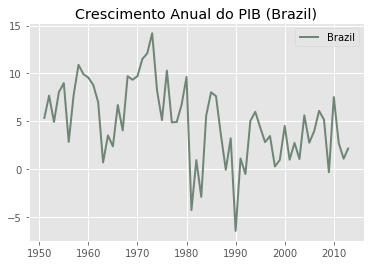

In [26]:
#---------------------------------------------------GRÁFICO--PIB----------------------------------------------------------------
plt.plot(gdp.loc[(gdp.index > 1950) & (gdp.index < 2014), "Brazil"], label="Brazil", color = '#6f8676')
plt.grid(True)
plt.legend()
plt.title("Crescimento Anual do PIB (Brazil)")
plt.show()

Esses dados são de 1950 à 2014, para entendermos melhor o impacto do Mercosul, vamos pegar os anos de 1980 à 2000, assim será possível ter uma ideia dos 10 anos anteriores à entrada no Mercosul e os 10 anos posteriores.

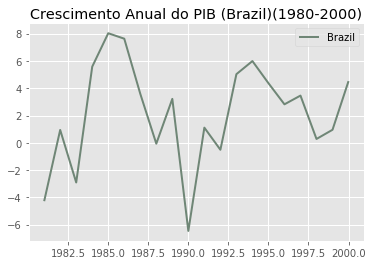

In [27]:
#---------------------------------------------------GRÁFICO--PIB----------------------------------------------------------------
plt.plot(gdp.loc[(gdp.index > 1980) & (gdp.index < 2001), "Brazil"], label="Brazil", color = '#6f8676')
plt.grid(True)
plt.legend()
plt.title("Crescimento Anual do PIB (Brazil)(1980-2000)")
plt.show()

É notável que após a entrada do Brasil no Mercosul (1991), houve um aumento do crescimento anual do PIB. Entretanto afirmar que o aumento se deve apenas pela entrada no Mercosul não é uma justificativa plausível. A exploração de mais dados para confirmar a hipótese ainda é necessária, portanto, como a principal fonte de movimentação financeira do Mercosul são as exportações e importações, vamos analisar os dados do Brasil referente à esses dois fatores.

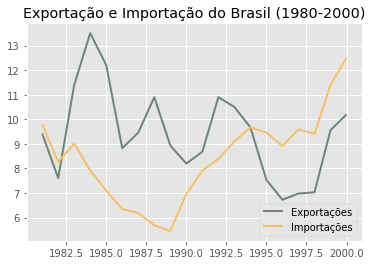

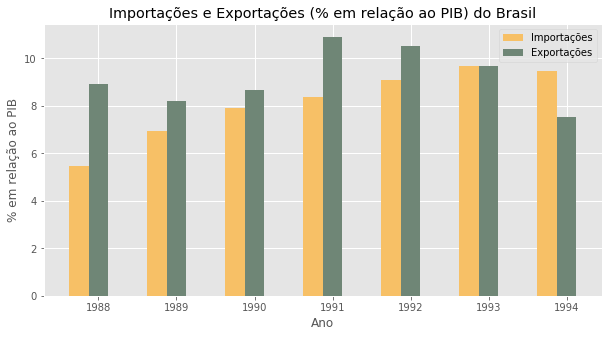

In [28]:
#------------------------------------------------------GRÁFICO-----------------------------------------------------------------
plt.plot(exportsgdp.loc[(exportsgdp.index > 1980) & (exportsgdp.index < 2001), "Brazil"], label="Exportações", color = '#6f8676')
plt.plot(importsgdp.loc[(exportsgdp.index > 1980) & (exportsgdp.index < 2001), "Brazil"], label="Importações", color = '#f7c066')
plt.grid(True)
plt.legend()
plt.title("Exportação e Importação do Brasil (1980-2000)")
plt.show()
#-----------------------------------------------GRÁFICO--DE--BARRAS------------------------------------------------------------
imp_br = []
i = 1
while i <= 7:
    impbr = importsgdp.loc[1988+i,"Brazil"]
    imp_br.append(impbr)
    i+=1

#--------------------------------------------------------------
exp_br = []
i = 1
while i <= 7:
    expbr = exportsgdp.loc[1988+i,"Brazil"]
    exp_br.append(expbr)
    i+=1

#---------------------------------------------------------------
anos = [1991,1992,1993,1994,1995]
barWidth = 0.25

#Aumentando o Gráfico
plt.figure(figsize=(10,5))

#Posições das barras
r1 = np.arange(len(imp_br))
r2 = [x + barWidth for x in r1]

plt.bar(r1, imp_br, color='#f7c066',width=barWidth,label='Importações')
plt.bar(r2, exp_br, color="#6f8676",width=barWidth,label='Exportações')
plt.xlabel("Ano")
plt.xticks([r + barWidth for r in range(len(imp_br))], [1988,1989,1990,1991,1992,1993,1994,1995])
plt.ylabel("% em relação ao PIB")
plt.title("Importações e Exportações (% em relação ao PIB) do Brasil")
plt.legend()
plt.show()

Realmente, em 1991, houve um aumento nas importações e nas exportações. Mas isso pode ocorrer por diversos fatores, então para
confirmar que o fator determinante desse aumento foi o Mercosul, vamos comparar as importações e exportações do Brasil com as de outros países que não fazem (ou faziam) parte do Bloco Econômico nos anos de 1991 à 2000. 

### Correlação:

Com a finalidade de se entender melhor as relações entre esses três fatores (crescimento anual do PIB brasileiro, importações e exportações em relação percentual com o PIB brasileiro) a biblioteca seaborn será utilizada, para a criação de gráficos que podem apresentar a correlação entre esses fatores.

In [58]:
impgdp = pd.read_excel("imports_percent_of_gdp.xlsx")
expgdp = pd.read_excel("exports_percent_of_gdp.xlsx")
gdp2 = pd.read_excel('gdp.xlsx')

impgdp = impgdp.set_index("country")
expgdp = expgdp.set_index("country")
gdp2 = gdp2.set_index("country")

gdp2 = gdp2.loc[["Brazil", "South Africa"]].transpose()
impgdp = impgdp.loc[["Brazil", "South Africa"]].transpose()
expgdp = expgdp.loc[["Brazil", "South Africa"]].transpose()

impgdp= impgdp.rename(columns = {'Brazil':'Brazil IMP', 'South Africa':'South Africa IMP'})
expgdp= expgdp.rename(columns = {'Brazil':'Brazil EXP', 'South Africa':'South Africa EXP'})
gdp2= gdp2.rename(columns = {'Brazil':'Brazil GDP', 'South Africa':'South Africa GDP'})

gdp2 = gdp2.loc[(gdp2.index > 1979) & (gdp2.index < 2001)]
impgdp = impgdp.loc[(impgdp.index > 1979) & (impgdp.index < 2001)]
expgdp = expgdp.loc[(expgdp.index > 1979) & (expgdp.index < 2001)]
impgdp

country,Brazil IMP,South Africa IMP
1980,11.30,26.5
1981,9.80,29.4
1982,8.27,26.0
1983,9.01,20.3
1984,7.92,22.9
1985,7.10,21.9
1986,6.35,21.1
1987,6.19,19.7
1988,5.69,21.9
1989,5.46,20.7


In [30]:
df1 = impgdp.join(gdp2, how='inner', lsuffix=' ', rsuffix=' ')
df2 = expgdp.join(gdp2, how='inner', lsuffix=' ', rsuffix=' ')
df3 = impgdp.join(expgdp, how='inner', lsuffix=' ', rsuffix=' ')

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


A correlação entre a exportação e o PIB no Brasil entre os anos de 1980 à 2000 é de 0.1477256234721897
A correlação entre a importação e o PIB no Brasil entre os anos de 1980 à 2000 é de 0.10305816951980726
A correlação entre a importação e a exportação entre os anos de 1980 à 2000 é de -0.12586210529010297


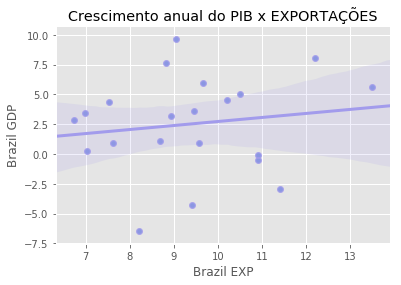

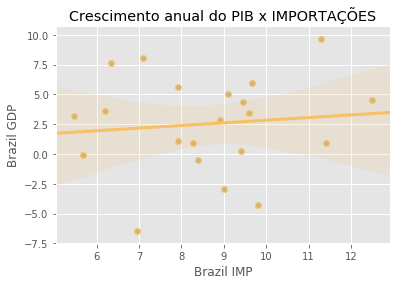

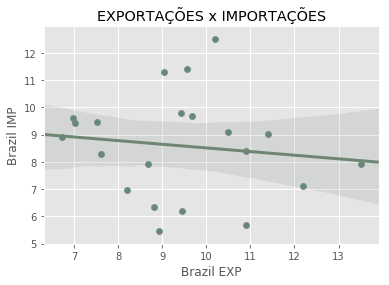

In [31]:
df2.plot.scatter(x='Brazil EXP',y='Brazil GDP', loglog = False);
sns.regplot(df2["Brazil EXP"],df2["Brazil GDP"], color=('#a29bec'))
plt.title("Crescimento anual do PIB x EXPORTAÇÕES")
plt.grid(True)
print('A correlação entre a exportação e o PIB no Brasil entre os anos de 1980 à 2000 é de', df2['Brazil EXP'].corr(df2['Brazil GDP']))

   
print('A correlação entre a importação e o PIB no Brasil entre os anos de 1980 à 2000 é de', df1['Brazil IMP'].corr(df1['Brazil GDP']))

df3.plot.scatter(x='Brazil EXP',y='Brazil IMP', loglog = False);
sns.regplot(df3["Brazil EXP"],df3["Brazil IMP"], color=('#6f8676'))
plt.title("EXPORTAÇÕES x IMPORTAÇÕES")
plt.grid(True)
print('A correlação entre a importação e a exportação entre os anos de 1980 à 2000 é de', df3['Brazil EXP'].corr(df3['Brazil IMP']))

### Comparação dos Dados:

Para "validar" a hipótese de que a entrada do Brasil no Mercosul provocou o aumento do crescimento anual do PIB, é necessário comparar com países que fazem parte do bloco econômico e países que não fazem parte do bloco econômico e que possuem certa semelhança em relação à economia com o Brasil.

In [32]:
importsgdp = pd.read_excel("imports_percent_of_gdp.xlsx")
exportsgdp = pd.read_excel("exports_percent_of_gdp.xlsx")
importsgdp = importsgdp.set_index("country")
exportsgdp = exportsgdp.set_index("country")
importsgdp = importsgdp.loc[["Brazil", "South Africa", "Austria", "Norway", "New Zealand", "Russia", "China", "India"]].transpose()
exportsgdp = exportsgdp.loc[["Brazil", "South Africa", "Austria", "Norway", "New Zealand", "Russia", "China", "India"]].transpose()

gdp = pd.read_excel('gdp.xlsx')
gdp = gdp.set_index("country")
gdp = gdp.loc[["Brazil", "South Africa", "Mexico", "Norway", "New Zealand", "Panama", "India"]].transpose()

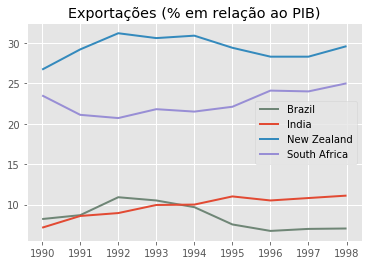

In [33]:
plt.plot(exportsgdp.loc[(exportsgdp.index > 1989) & (exportsgdp.index < 1999), "Brazil"], label="Brazil", color = '#6f8676')
plt.plot(exportsgdp.loc[(exportsgdp.index > 1989) & (exportsgdp.index < 1999), "India"], label="India")
plt.plot(exportsgdp.loc[(exportsgdp.index > 1989) & (exportsgdp.index < 1999), "New Zealand"], label="New Zealand")
plt.plot(exportsgdp.loc[(exportsgdp.index > 1989) & (exportsgdp.index < 1999), "South Africa"], label="South Africa")
plt.grid(True)
plt.legend()
plt.title("Exportações (% em relação ao PIB)")
plt.show()

Ao analisarmos, aparentemente os países de fora do Mercosul também apresentaram um aumento nas exportações entre os anos de 1990 à 1995

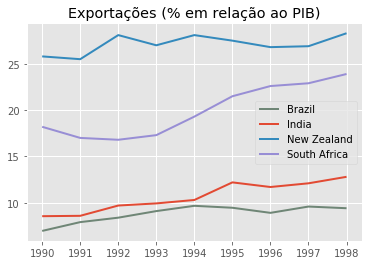

In [34]:
plt.plot(importsgdp.loc[(importsgdp.index > 1989) & (importsgdp.index < 1999), "Brazil"], label="Brazil", color = '#6f8676')
plt.plot(importsgdp.loc[(importsgdp.index > 1989) & (importsgdp.index < 1999), "India"], label="India")
plt.plot(importsgdp.loc[(importsgdp.index > 1989) & (importsgdp.index < 1999), "New Zealand"], label="New Zealand")
plt.plot(importsgdp.loc[(importsgdp.index > 1989) & (importsgdp.index < 1999), "South Africa"], label="South Africa")
plt.grid(True)
plt.legend()
plt.title("Exportações (% em relação ao PIB)")
plt.show()

Os países de fora do Mercosul também apresentaram um aumento nas importações entre os anos de 1990 à 1995

A princípio, o Brasil teve um aumento nas exportações e importações. Entretanto ao analisarmos o contexto mundial é possível
notar que houve esse aumento em todo o mundo, ou seja, o mundo inteiro começou a exportar e importar mais. Logo não é possível
concluir que o crescimento anual do PIB aumentou devido ao aumento nas importações e exportações.

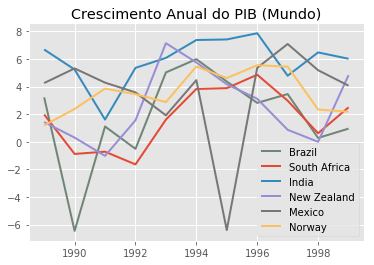

In [35]:
plt.plot(gdp.loc[(gdp.index > 1988) & (gdp.index < 2000), "Brazil"], label="Brazil", color = '#6f8676')
plt.plot(gdp.loc[(gdp.index > 1988) & (gdp.index < 2000), "South Africa"], label="South Africa")
plt.plot(gdp.loc[(gdp.index > 1988) & (gdp.index < 2000), "India"], label="India")
plt.plot(gdp.loc[(gdp.index > 1988) & (gdp.index < 2000), "New Zealand"], label="New Zealand")
plt.plot(gdp.loc[(gdp.index > 1988) & (gdp.index < 2000), "Mexico"], label="Mexico")
plt.plot(gdp.loc[(gdp.index > 1988) & (gdp.index < 2000), "Norway"], label="Norway")
plt.grid(True)
plt.legend()
plt.title("Crescimento Anual do PIB (Mundo)")
plt.show()

### Conclusão:
    Ao Observar o crescimento anual do PIB em um contexto mundial, nota-se que a maioria dos países apresentam um aumento
    no crescimento anual do PIB. Assim não é possível concluir que o aumento do Brasil se deve apenas ao Mercosul, visto que
    em um contexto mundial, o mundo apresentou o aumento.

America do Norte: Mexico
America do Sul:Brazil
America Central: Panama
Ásia: India
Europa: Norway
Oceania: New Zealand

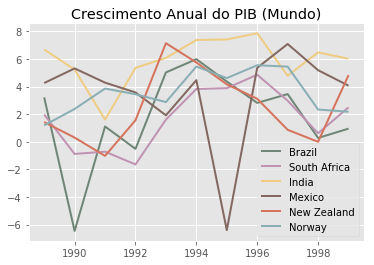

In [36]:
plt.plot(gdp.loc[(gdp.index > 1988) & (gdp.index < 2000), "Brazil"], label="Brazil", color = '#6f8676')
plt.plot(gdp.loc[(gdp.index > 1988) & (gdp.index < 2000), "South Africa"], label="South Africa", color = '#c093b2')
plt.plot(gdp.loc[(gdp.index > 1988) & (gdp.index < 2000), "India"], label="India", color = '#efcc82')
plt.plot(gdp.loc[(gdp.index > 1988) & (gdp.index < 2000), "Mexico"], label="Mexico", color = '#826860')
plt.plot(gdp.loc[(gdp.index > 1988) & (gdp.index < 2000), "New Zealand"], label="New Zealand", color = '#d6735d')
plt.plot(gdp.loc[(gdp.index > 1988) & (gdp.index < 2000), "Norway"], label="Norway", color = '#89afb4')
plt.grid(True)
plt.legend()
plt.title("Crescimento Anual do PIB (Mundo)")
plt.show()

In [37]:
gdp_br = []
i = 1
while i <= 7:
    gdpbr = gdp.loc[1988+i,"Brazil"]
    gdp_br.append(gdpbr)
    i+=1
print('1')

1


In [38]:
#--------------------------------------------------------------
gdp_norway = []
i = 1
while i <= 7:
    gdpnorway = gdp.loc[1988+i,"Norway"]
    gdp_norway.append(gdpnorway)
    i+=1
print('2')

2


In [39]:
#---------------------------------------------------------------
gdp_nz = []
i = 1
while i <= 7:
    gdpnz = gdp.loc[1988+i,"New Zealand"]
    gdp_nz.append(gdp_nz)
    i+=1
print('3')

3


In [40]:
#---------------------------------------------------------------
gdp_in = []
i = 1
while i <= 7:
    gdpin = gdp.loc[1988+i,"India"]
    gdp_in.append(gdpin)
    i+=1
print('4')

4


In [41]:
#---------------------------------------------------------------
gdp_sa = []
i = 1
while i <= 7:
    gdpsa = gdp.loc[1988+i,"South Africa"]
    gdp_sa.append(gdpsa)
    i+=1
print('5')

5


In [42]:
#---------------------------------------------------------------
gdp_mx = []
i = 1
while i <= 7:
    gdpmx = gdp.loc[1988+i,"Mexico"]
    gdp_mx.append(gdpmx)
    i+=1
print('6')

6


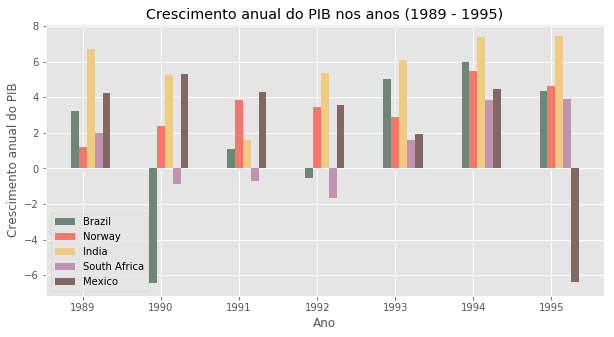

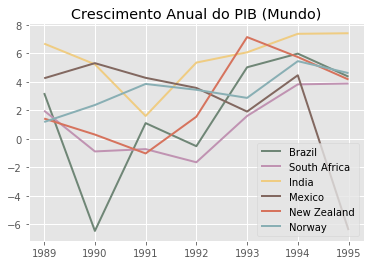

In [55]:
barWidth = 0.10

#Aumentando o Gráfico
plt.figure(figsize=(10,5))

#Posições das barras
r1 = np.arange(len(imp_br))
r2 = [x + barWidth for x in r1]
#r3 = [x + barWidth for x in r2]
r3 = [x + barWidth for x in r2]
r4 = [x + barWidth for x in r3]
r5 = [x + barWidth for x in r4]

plt.bar(r1, gdp_br, color='#6f8676',width=barWidth,label='Brazil')
plt.bar(r2, gdp_norway, color="#fa756b",width=barWidth,label='Norway')
#plt.bar(r3, gdp_nz, color="#d6735d",width=barWidth,label='New Zealand')
plt.bar(r3, gdp_in, color="#efcc82",width=barWidth,label='India')
plt.bar(r4, gdp_sa, color="#c093b2",width=barWidth,label='South Africa')
plt.bar(r5, gdp_mx, color="#826860",width=barWidth,label='Mexico')
plt.xlabel("Ano")
plt.xticks([r + barWidth for r in range(len(gdp_br))], [1989,1990,1991,1992,1993,1994,1995, 1996])
plt.ylabel("Crescimento anual do PIB")
plt.title("Crescimento anual do PIB nos anos (1989 - 1995)")
plt.legend()
plt.show()

plt.plot(gdp.loc[(gdp.index > 1988) & (gdp.index < 1996), "Brazil"], label="Brazil", color = '#6f8676')
plt.plot(gdp.loc[(gdp.index > 1988) & (gdp.index < 1996), "South Africa"], label="South Africa", color = '#c093b2')
plt.plot(gdp.loc[(gdp.index > 1988) & (gdp.index < 1996), "India"], label="India", color = '#efcc82')
plt.plot(gdp.loc[(gdp.index > 1988) & (gdp.index < 1996), "Mexico"], label="Mexico", color = '#826860')
plt.plot(gdp.loc[(gdp.index > 1988) & (gdp.index < 1996), "New Zealand"], label="New Zealand", color = '#d6735d')
plt.plot(gdp.loc[(gdp.index > 1988) & (gdp.index < 1996), "Norway"], label="Norway", color = '#89afb4')
plt.grid(True)
plt.legend()
plt.title("Crescimento Anual do PIB (Mundo)")
plt.show()